In [ ]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/ .kaggle/

cp: cannot stat 'kaggle.json': No such file or directory
cp: -r not specified; omitting directory '/root/'


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 42.7MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization

In [ ]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/test',
     labels='inferred',
     label_mode = 'int',
     batch_size=32,
     image_size=(256,256)
 )


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
from keras.layers import MaxPooling2D
from keras.layers import Dropout
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.2560 - accuracy: 0.5803 - val_loss: 0.6479 - val_accuracy: 0.6432
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5877 - accuracy: 0.7019 - val_loss: 0.5305 - val_accuracy: 0.7318
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4877 - accuracy: 0.7704 - val_loss: 0.5416 - val_accuracy: 0.7512
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4242 - accuracy: 0.8099 - val_loss: 0.4369 - val_accuracy: 0.7892
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3787 - accuracy: 0.8328 - val_loss: 0.4914 - val_accuracy: 0.7820
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3123 - accuracy: 0.8654 - val_loss: 0.5679 - val_accuracy: 0.7612
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2491 - accuracy: 0.9005 - val_loss: 0.6055 - val_ac

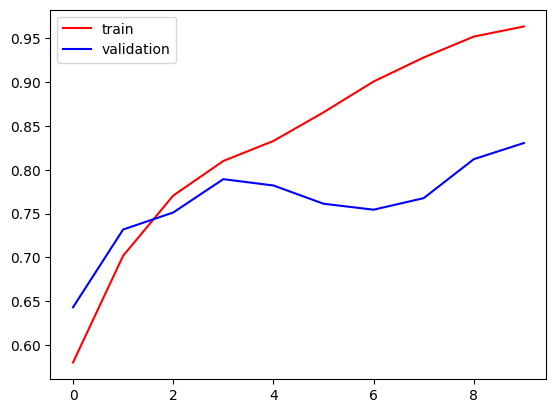

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


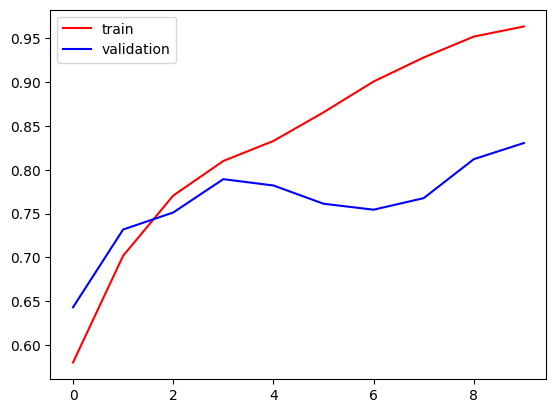

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

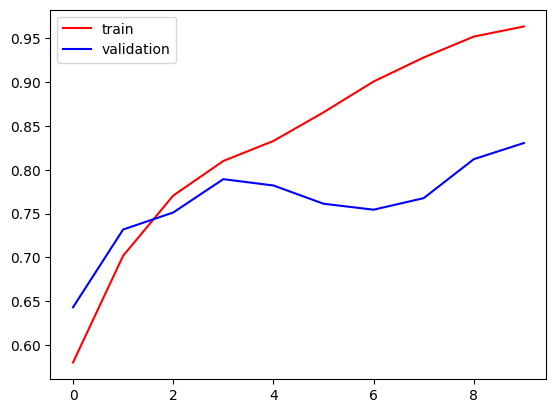

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

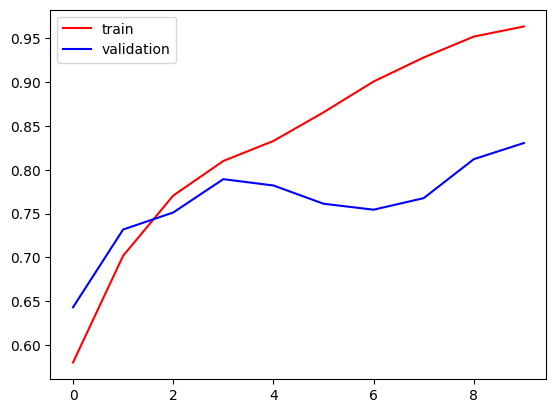

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

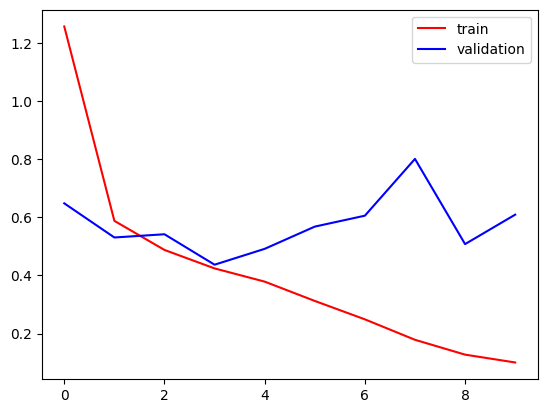

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity

#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/download.jfif')

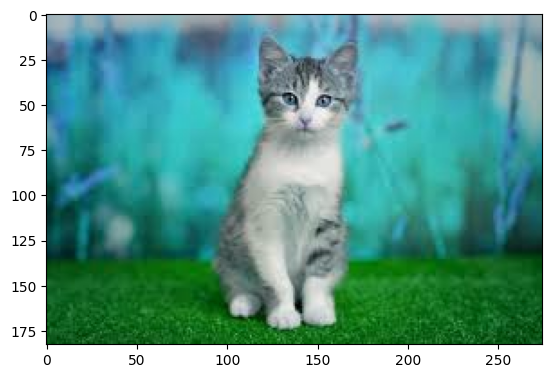

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(183, 275, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 436ms/step


array([[0.]], dtype=float32)

In [ ]:
test_image = cv2.imread('/content/1.jfif')

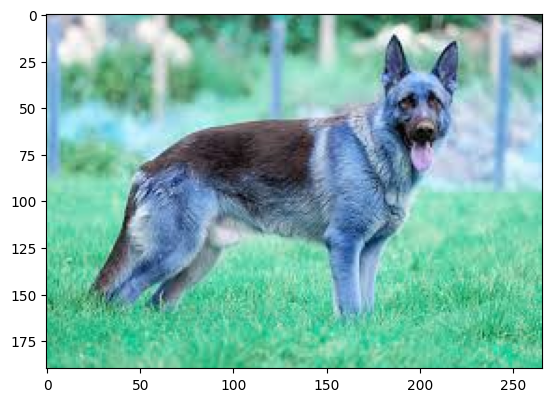

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(190, 266, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)